https://www.kaggle.com/grroverpr/pandas-cheatsheet

In [87]:
import urllib.request
import ssl

url_string = 'https://www.kaggleusercontent.com/kf/3317693/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..u_ccPV_jkVDxA2wn-q0EHA.oHcZ0mdfJeQTYsRwyP3GOEfb7_1UZ1bVlh1SUb4wP7ZjD_J-mgXoAYGrXwnXUVX3V9YesLQlEKYBQQrw-d4x_qENpuSxvQNPHC1rJjSilfAhHBNKOkbUJ7x4zpn2H-MseTdw-bdS3bXom7GoQeFwcg.8Y_dLeZt0mhjNpDnfVcHpg/__results___files/__results___98_0.png'
file_name = 'images/combine.png'
#urllib.request.urlretrieve(url_string,file_name)
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

with urllib.request.urlopen(url_string, context=ctx) as u, open(file_name, 'wb') as f:
    f.write(u.read())

HTTPError: HTTP Error 403: Forbidden

# 목차
- 입출력

In [2]:
import pandas as pd
import numpy as np # necessity as pandas is built on np
from IPython.display import Image # to display images

Pandas 라이브러리는 Numpy기반으로 만들어졌으며 사용하기 쉬운 데이터 구조를 갖고 있는 Python용 데이터 분석 툴이다.

Cheatsheet는 아래 것들을 참고했다.
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience+(1).pdf
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Pandas_Cheat_Sheet_2.pdf

## 입출력
다른 데이터 타입들을 pandas dataframe을 통해 읽을 수 있으며, 스프레드시트 테이블 같이 생겼다.

* 일반적인 입력 함수들
    - pd.read_csv
    - pd.read_excel / pd.ExcelFile
    - pd.read_feather (feather 포맷은 데이터를 바이너리 형태로 저장하기 때문에 메모리 사용량을 감소시킨다.)
    - pd.read_json
    - pd.read_html
    - pd.read_pickle (can also infer if pickled object is zipped using infer=)
* 출력 함수는 `to_xxx`

Pandas 데이터구조

Pandas 데이터 구조에는 `series`와 `dataframe`이 있다.

**Series**: 어떤 데이터 타입도 가질 수 있는 일차원 labeled array

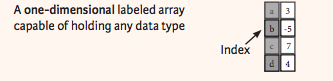

In [4]:
Image('images/series.png', width=500) # not pandas, just showing example series

In [3]:
# index will set the index for further reference
# data can be passed as list
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c','d'])
s

a    3
b   -5
c    7
d    4
dtype: int64

인덱스명과 번호 둘 다 사용해서 인덱싱 가능

In [4]:
s[1:]

b   -5
c    7
d    4
dtype: int64

In [5]:
s['a']

3

In [6]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [7]:
# Series using dictionary
s2 = pd.Series({'a': 3, 'b': -1, 'c': 12}); s2

a     3
b    -1
c    12
dtype: int64

In [8]:
s2['b']

-1

**Dataframe** : 다른 데이터 타입의 컬럼들을 갖는 2차원 라벨링된 데이터 구조. 엑셀과 비슷하며 list의 dictionary나 list를 사용해서 생성 가능하다.

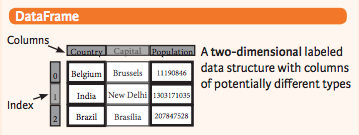

In [16]:
Image('images/df.png', width=500)

In [17]:
data = {
    'Country': ['Belgium','India','Brzail'],
    'Capital': ['Brussels','New Delhi','Brasilia'],
    'Population': [11190846, 1303171035, 207847528]
       }

In [18]:
df_sample = pd.DataFrame(data,
                        columns=['Country','Capital','Population'])

In [19]:
df_sample

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brzail,Brasilia,207847528


**Common dataframe functaionality**

데이터 탐색 및 분석을 위해 유명한 'titanic data'를 사용해보자. https://www.kaggle.com/c/titanic/data

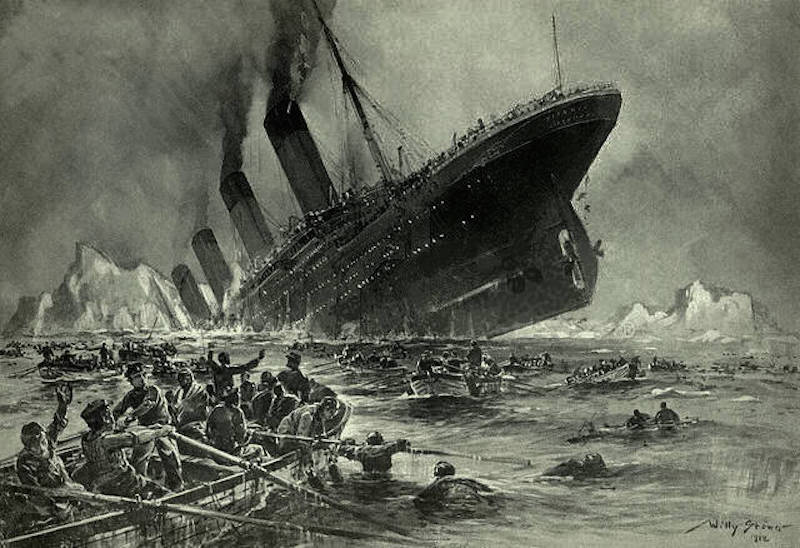

In [21]:
Image('images/titanic.jpg', width=700)

dataframe 데이터를 가졌을 때 수행하는 일반적인 작업
- `df.shape`: dataframe shape 살펴보기 (row의 갯수, column의 갯수)
- `pd.head()`: 상위 5개 row를 살펴보기
- `pd.dtypes`: 각 컬럼의 데이터타입을 점검하기
- `pd.columns`: 컬럼 이름 점검하기
- `pd.nunique()`: cardinality level을 살펴보기 위해 각 컬럼의 unique 값들 개수 세기
- `pd.info()`: 각 컬럼에서 널이 아닌 값의 개수, 메모리 사용량, 데이터타입(특히 용량의 큰 df인 경우) 살펴보기


In [12]:
# read csv file
df = pd.read_csv('titanic/train.csv')

In [24]:
df.shape

(891, 12)

In [25]:
# see top 5 rows of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# see datatype of each variable
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
# column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
# unique value for each variable
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [29]:
# not null part is very useful to see how many nulls are there in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### iloc
숫자 위치 기반으로 데이터를 선택할 수 있으며 한개 이상 선택도 가능하다. (i가 있는 이유임)

In [31]:
# 0 row, 4 column
df.iloc[0, 4]

'male'

In [32]:
# indexes are maintained. Can reset_index() to start idex from 0
df.iloc[1:4, 2:6]

,Pclass,Name,Sex,Age
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0


#### loc
컬럼의 라벨명으로 데이터 선택할 수 있으며 한개 이상 선택도 가능하다.

In [34]:
# here row indexes are numbers but column indexes are name of columns
df.loc[1:2, 'Name':'Age']

,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0


In [35]:
# here row indexes are numbers
df.loc[2,['Name','Age']]

Name    Heikkinen, Miss. Laina
Age                         26
Name: 2, dtype: object

#### Boolean 인덱싱

조건에 맞는 row를 반환한다.
- or -> 조건 1 `|` 조건 2 (`or` 또한 사용할 수 있으나 여러 조건들을 사용할 경우에는 애매한 에러가 발생한다.)
- and -> 조건 1 `&` 조건 2 (`and` 또한 사용할 수 있으나 여러 조건들을 사용할 경우에는 애매한 에러가 발생한다.)
- not -> `~` (not 조건)
- equal -> `==` 조건을 만족하는 경우
- `any()` -> 조건을 만족하는 값이 하나라도 있는 컬럼/열
- `all()` -> 모든 값이 조건을 만족하는 컬럼/열

In [38]:
# select rows with either sex as femail or Pclass as 1
df[(df.Sex == 'femail') | (df.iloc[:, 2] == 1)].iloc[:3] # () are important

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [42]:
# first 3 rows of gives all columns which have all string values or all int > 1 values

df.loc[:, (df > 1).all()][:3]

TypeError: '>' not supported between instances of 'str' and 'int'

In [45]:
# first 3 rows of all columns which have all not null values
df.loc[:, df.notnull().all()][:3]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250


In [46]:
# first 3 rows of all columns which have at least 1 null value
df.loc[:, df.isnull().any()][:3]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S


In [47]:
df[(df.iloc[:, 2] == 1) & (df.Sex == 'female')].shape

(94, 12)

In [51]:
# fraction of males with Age > 25, df.shape[0] -> number of rows
sum((df.Age > 25) & (df.Sex == 'male'))/df.shape[0]

0.3075196408529742

In [52]:
# number of people who survived and were not in class 3
sum((df.Survived != 0 ) & (~(df.Pclass == 3)))

223

#### querying
boolean 표현으로 dataframe의 컬럼들을 조회 (열들 필터)

In [53]:
# filter all rows which have Age > Passenger ID
df.query('Age > PassengerId')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


#### filter
regex나 아이템 이름으로 컬럼명이나 열 명으로 필터

In [54]:
# filter only sex and age columns (first 2 rows)
df.filter(items=['Age', 'Sex'])[:2]

,Age,Sex
0,22.0,male
1,38.0,female


In [55]:
# filter only 0 and 5 row index
df.filter(items=[0, 5], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [56]:
# first 2 rows of column names ending with 'ed' (think of past tense)
df.filter(like = 'ed', axis=1)[:2]

,Survived,Embarked
0,0,S
1,1,C


In [57]:
# Can use same thing as above using regex also
df.filter(regex='ed$', axis=1)[:2]

,Survived,Embarked
0,0,S
1,1,C


#### isin
여러개 값 리스트로 컬럼의 행을 필터

In [58]:
df[df.Pclass.isin([0, 1])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


#### Setting/Resetting Index
Setting/Resetting Index는 2개 dataframe을 merge/groupby 할 때 그리고 새 dataframe을 추가분석하기를 원할 때 상당히 중요하다. 반복된 인덱스를 갖는 dataframe는 필터링 시 문제를 일으킬 수 있다. 이와 별도로 merge를 빠르게 수행하기 위해 컬럼을 인덱스로 설정할 수 있다. 

##### set_index()
원하는 컬럼을 dataframe의 인덱스로 지정한다.

In [60]:
# setting
df.set_index('Ticket')[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,
A/5 21171,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
PC 17599,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


In [61]:
df.set_index(['Ticket','Name'])[:2]

,,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,Name,,,,,,,,,,
A/5 21171,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,7.2500,NaN,S
PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,71.2833,C85,C


In [63]:
df.set_index(['Ticket', "Name"]).index[0]

('A/5 21171', 'Braund, Mr. Owen Harris')

##### reset_index()
index를 0....nrows-1로 리셋할 수 있다.

In [64]:
df_index = df.set_index(['Ticket','Name'])

In [65]:
df_index[:2]

,,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,Name,,,,,,,,,,
A/5 21171,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,7.2500,NaN,S
PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,71.2833,C85,C


In [66]:
df_index.reset_index()[:2]

,Ticket,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,A/5 21171,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,7.2500,NaN,S
1,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,71.2833,C85,C


위의 경우 index가 다시 0,1... 로 돌아갔다.

##### rename()
dataframe의 컬럼 명이나 열 인덱스의 이름을 변경할 수 있다. 기본은 index이다. 

In [67]:
df.rename(columns={'Name':'Whats_name','Fare':'Price'})[:2]

,PassengerId,Survived,Pclass,Whats_name,Sex,Age,SibSp,Parch,Ticket,Price,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [68]:
df.rename(mapper=str.lower, axis='columns')[:2]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Duplicated data
##### unique()
dataframe의 한 컬럼의 유일한 값들. 만약 각 컬럼의 유일한 값들을 세고 싶으면 nunique()를 사용하면 된다.

In [69]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

##### duplicated()
컬럼내 중복된 값ㅇ르 체크. 반환값 True/False

In [70]:
# there are no duplicate passengerid. good thing to check
sum(df.PassengerId.duplicated())

0

In [71]:
# can check duplicates in index also.
# useful if doubtful about duplicates in index doing bad things
sum(df.index.duplicated())

0

##### drop_duplicates
중복된 값을 갖는 행을 drop

In [72]:
# can help in getting unique combination of multiple columns
# unique() doesn't work in this case
df.loc[:,['Sex','Embarked']].drop_duplicates()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
5,male,Q
22,female,Q
26,male,C
61,female,NaN


#### Grouping data
몇몇 컬럼으로 그룹핑하고 그룹의 mean, count, sum 또는 custom function 값을 얻기 위해 aggregate할 수 있다.

##### groupby

In [74]:
# group by sex then count
# returns count in each column. differences in some cases because of nulls in those columns
# can do iloc[:, 0] to only get first column
df.groupby(by=['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [76]:
# can use multiple conditions
# group by sex and survived -> mean of age
df.groupby(by=['Sex','Survived']).mean().loc[:,'Age']

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [75]:
# can group by indexes also by using levels=
# useful when we have multiindexes
# can use agg function with lambda func
df_index = df.set_index(['Sex', 'Pclass'])
df_index.groupby(level=[0,1]).agg({'Fare': lambda x : sum(x)/len(x), # this is also just mean actually
                                  'Age': np.mean})

Fare        Age
Sex    Pclass                       
female 1       106.125798  34.611765
       2        21.970121  28.722973
       3        16.118810  21.750000
male   1        67.226127  41.281386
       2        19.741782  30.740707
       3        12.661633  26.507589

흥미로운 결과네요. 1등석 여성 티켓 비용이 1등석 남성 티켓 값의 약 두배입니다.

##### transform
모든 행을 변형시키는 transform을 사용해 모든 컬럼에 특정 function을 적용할 수 있다.

In [80]:
# shape of below code is same as original df
df_index.groupby(level=[0,1]).transform(lambda x: sum(x)/len(x)).head()

PassengerId  Survived  Age     SibSp     Parch        Fare
Sex    Pclass                                                            
male   3        455.515850  0.135447  NaN  0.498559  0.224784   12.661633
female 1        469.212766  0.968085  NaN  0.553191  0.457447  106.125798
       3        399.729167  0.500000  NaN  0.895833  0.798611   16.118810
       1        469.212766  0.968085  NaN  0.553191  0.457447  106.125798
male   3        455.515850  0.135447  NaN  0.498559  0.224784   12.661633

#### Handling missing data
##### dropna
na값을 갖는 행을 drop

In [81]:
# how=any -> row with any column = NA
df.dropna(axis=0, how='any').shape

(183, 12)

In [82]:
# how=all -> row with all columns = NA
df.dropna(axis=0, how='all').shape

(891, 12)

In [83]:
# drops column which have any row of NA
[set(df.columns) - set(df.dropna(axis=1, how='any').columns)]

[{'Age', 'Cabin', 'Embarked'}]

세 컬럼이 삭제되었습니다.

##### fillna

In [85]:
# replace with mean of that column
# can put any specific value also
# would not work for columns with string type like Cabin
df.fillna(np.mean)[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,<function mean at 0x7f20701eeea0>,S


#### Combining data

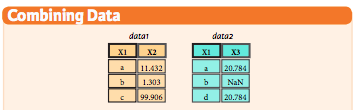

In [89]:
Image('images/combine.png', width=500)

##### merge/join
- how = 'left', 'right', 'outer', 'inner'
- on

In [6]:
data1 = pd.DataFrame({'x1': list('abc'), 'x2': [11.432, 1.303, 99.906]})
data2 = pd.DataFrame({'x1': list('abd'), 'x2': [20.784, np.NaN, 20.784]})

In [91]:
data1

,x1,x2
0,a,11.432
1,b,1.303
2,c,99.906


In [92]:
data2

,x1,x2
0,a,20.784
1,b,NaN
2,d,20.784


In [93]:
# inner join when both table have that key (like sql)
data1.merge(data2, how='inner', on='x1')

,x1,x2_x,x2_y
0,a,11.432,20.784
1,b,1.303,NaN


In [94]:
# outer joins on all keys in both df and creates NA
data1.merge(data2, how='outer', on='x1')

,x1,x2_x,x2_y
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN
3,d,NaN,20.784


`join`을 사용할 수도 있지만 `merge`가 더 빠르니 무조건 merge를 써라

In [99]:
data1.join(data2, on='x1', how='left', lsuffix='L')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

##### concatenate

In [101]:
pd.concat([data1, data2], axis=0)

,x1,x2
0,a,11.432
1,b,1.303
2,c,99.906
0,a,20.784
1,b,NaN
2,d,20.784


잘보면 index가 중복된 것을 알 수 있는데 원래 df의 index를 유지하기 때문이다.
index를 0부터 시작하는 것으로 만들기 위해 `ignore_index=True`를 사용할 수 있다.

In [102]:
pd.concat([data1, data2], axis=0, ignore_index=True)

,x1,x2
0,a,11.432
1,b,1.303
2,c,99.906
3,a,20.784
4,b,NaN
5,d,20.784


In [103]:
data2.loc[3] = ['g', 500] # adding new row
data2

,x1,x2
0,a,20.784
1,b,NaN
2,d,20.784
3,g,500.000


In [104]:
pd.concat([data1, data2], axis=1)

,x1,x2,x1,x2
0,a,11.432,a,20.784
1,b,1.303,b,NaN
2,c,99.906,d,20.784
3,NaN,NaN,g,500.000


### Date formatting
- `to_datetime()` -> 어떤 포맷 값도 datetime값으로 변환 (물론 datetime으로 파싱될 수 있는 값이어야 함)
- `date_range()` -> datetime 데이터를 생성
- `Datetimeindex()` -> datetypeindex 데이터

In [3]:
pd.to_datetime('2018-2-19')

Timestamp('2018-02-19 00:00:00')

In [4]:
# gives datetimeindex format
pd.date_range('2018-4-18', periods=6, freq='d')

DatetimeIndex(['2018-04-18', '2018-04-19', '2018-04-20', '2018-04-21',
               '2018-04-22', '2018-04-23'],
              dtype='datetime64[ns]', freq='D')

In [7]:
data1['date'] = pd.date_range('2019-4-18', periods=3, freq='d')

In [8]:
data1

,x1,x2,date
0,a,11.432,2019-04-18
1,b,1.303,2019-04-19
2,c,99.906,2019-04-20


In [9]:
data1.date

0   2019-04-18
1   2019-04-19
2   2019-04-20
Name: date, dtype: datetime64[ns]

In [10]:
pd.DatetimeIndex(data1.date)

DatetimeIndex(['2019-04-18', '2019-04-19', '2019-04-20'], dtype='datetime64[ns]', name='date', freq=None)

### Reshaping data

#### pivot -> reshape data
엑셀의 피벗 데이틀과 동일

In [13]:
# index = new index, columns = new_columns, values = values to put
df.pivot(index='Sex', columns = 'PassengerId', values = 'Age')

PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Sex,,,,,,,,,,,,,,,,,,,,,
female,NaN,38.0,26.0,35.0,NaN,NaN,NaN,NaN,27.0,14.0,...,NaN,22.0,NaN,NaN,39.0,NaN,19.0,NaN,NaN,NaN
male,22.0,NaN,NaN,NaN,35.0,NaN,54.0,2.0,NaN,NaN,...,33.0,NaN,28.0,25.0,NaN,27.0,NaN,NaN,26.0,32.0


위 케이스에서 피벗을 사용하는 것은 의미가 없으나 그냥 예시다.

#### stack
전 df를 1개의 긴 포맷으로 변환

In [14]:
df.stack()

0    PassengerId                          1
     Survived                             0
     Pclass                               3
     Name           Braund, Mr. Owen Harris
     Sex                               male
                             ...           
890  SibSp                                0
     Parch                                0
     Ticket                          370376
     Fare                              7.75
     Embarked                             Q
Length: 9826, dtype: object

일반적으로 사용하지 않는다.

#### Iteration
컬럼/행 인덱스, series 쌍을 얻기 위해 사용
- `iteritems()` 컬럼 인덱스, series 용
- `iterrows()` 행 인덱스, series 용

In [16]:
list(df.Sex.iteritems())[:5]

[(0, 'male'), (1, 'female'), (2, 'female'), (3, 'female'), (4, 'male')]

In [17]:
list(df.iterrows())[0]

(0, PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                                 22
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

### Apply functions
- `apply` -> df에 function을 적용
- `apply_map` -> apply function elementwise (for each series of df. think of column wise)

In [18]:
# function squares when type(x) = float, cubes when type(x) = int, return same when other
f = lambda x: x**2 if type(x) == float else x**3 if type(x) == int else x

In [19]:
# whole series is passed
df.Fare.apply(f)[:3]

0      52.562500
1    5081.308859
2      62.805625
Name: Fare, dtype: float64

In [20]:
# elements are passed
df.applymap(f)[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,27,"Braund, Mr. Owen Harris",male,484.0,1,0,A/5 21171,52.562500,NaN,S
1,8,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1444.0,1,0,PC 17599,5081.308859,C85,C
2,27,1,27,"Heikkinen, Miss. Laina",female,676.0,0,0,STON/O2. 3101282,62.805625,NaN,S


### Working with text data
문자 데이터타입을 갖고 있을 떄 할 수 있는 것들

#### str
string 포맷을 갖고 pandas series/df에서 작업

We can do:

* str.upper()/lower() to convert string into upper or lower case
* str.len() to find the length of sting
* str.strip()/lstrip()/rstrip() to strip spaces
* str.replace() to replace anything from string
* str.split() to split words of string or using some other delimiter
* str.get() to access elements in slit list
* str.resplit() spit in reverse order of string based on some delimiter
* str.extract() extract specific thing from string. alphabet or number

Let's see how to use all that in pandas series. Keep in mind pandas DataFrame has no attribute called `str` and works on Series object only. So, grab column of df, then apply `str`

In [21]:
# converts all rows into lower
df.Name.str.lower().head()

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: Name, dtype: object

In [22]:
# converts all rows into upper
df.Sex.str.upper().head()

0      MALE
1    FEMALE
2    FEMALE
3    FEMALE
4      MALE
Name: Sex, dtype: object

In [23]:
# counts all the characters including spaces
df.Name.str.len().head()

0    23
1    51
2    22
3    44
4    24
Name: Name, dtype: int64

In [24]:
# splits strings in each row over whitespaces ()
# expand=True : expand columns
# pat = regex to split on
df.Name.str.split(pat=',', expand=True).head().rename(columns={0:'First_Name', 1: 'Last_name'})

,First_Name,Last_name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


In [25]:
# splits strings in each row over whitespaces ()
# expand=False : doesn't expand columns
# pat = regex to split on

df.Name.str.split(expand=False).head()

0                         [Braund,, Mr., Owen, Harris]
1    [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                           [Heikkinen,, Miss., Laina]
3    [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                        [Allen,, Mr., William, Henry]
Name: Name, dtype: object

In [26]:
# replace Mr. with empty space
df.Name.str.replace('Mr.', '').head()

0                                Braund,  Owen Harris
1    Cumings, . John Bradley (Florence Briggs Thayer)
2                              Heikkinen, Miss. Laina
3           Futrelle, . Jacques Heath (Lily May Peel)
4                               Allen,  William Henry
Name: Name, dtype: object

In [27]:
# get() is used to get particular row of split
df.Name.str.split().get(1)

['Cumings,', 'Mrs.', 'John', 'Bradley', '(Florence', 'Briggs', 'Thayer)']

In [28]:
df.Name[:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [29]:
# Extract just last name
df.Name.str.extract('(?P<Last_Name>[a-zA-Z]+)', expand=True).head()

,Last_Name
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
